Dissimilarity Results:
         Method  Dissimilarity
0     Heuristic       0.034747
1         Naive       0.043773
2  Jaro-Winkler       0.002170


<ipython-input-32-79b7812ea5d9>:50: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


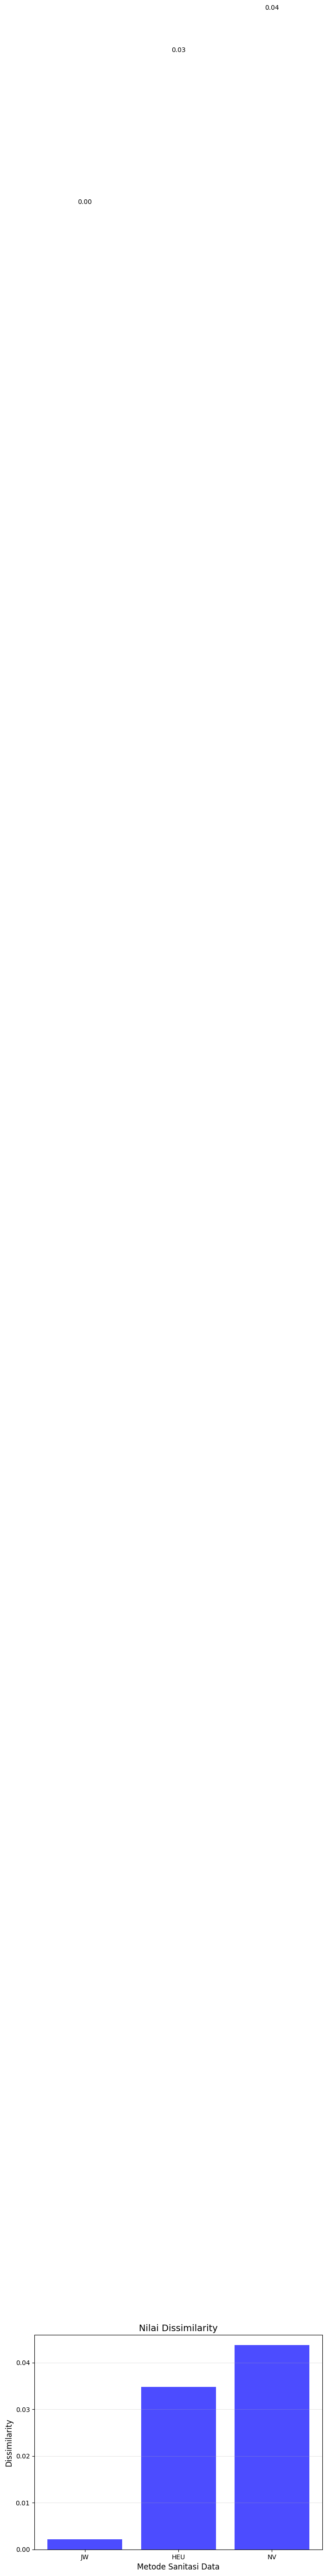

In [32]:
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

# Load dataset
def load_dataset(file_path):
    with open(file_path, 'r') as file:
        return [set(map(int, line.strip().split())) for line in file]

# Get item frequencies
def get_item_frequencies(dataset):
    item_counts = Counter()
    for transaction in dataset:
        item_counts.update(transaction)
    return item_counts

# Filter items based on minSupp
def filter_by_min_supp(frequencies, min_supp, total_transactions):
    min_count = min_supp * total_transactions
    return {item: freq for item, freq in frequencies.items() if freq >= min_count}

# Calculate dissimilarity based on the formula
def calculate_dissimilarity_with_formula(original_frequencies, modified_frequencies):
    total_original = sum(original_frequencies)
    total_modified = sum(modified_frequencies)

    if total_original == 0:  # Avoid division by zero
        return None

    difference = abs(total_original - total_modified)
    dissimilarity = (1 / total_original) * difference
    return dissimilarity

# Plot dissimilarity as bar chart
def plot_dissimilarity_bar_chart(methods, dissimilarity_values):
    plt.figure(figsize=(8, 6))
    plt.bar(methods, dissimilarity_values, color='blue', alpha=0.7)

    # Add labels, title, and grid
    plt.xlabel("Metode Sanitasi Data", fontsize=12)
    plt.ylabel("Dissimilarity", fontsize=12)
    plt.title("Nilai Dissimilarity", fontsize=14)
    plt.grid(axis='y', alpha=0.3)

    # Add value annotations on top of bars
    for i, value in enumerate(dissimilarity_values):
        plt.text(i, value + 0.5, f"{value:.2f}", ha='center', fontsize=10)

    # Show the chart
    plt.tight_layout()
    plt.show()

# File paths
original_path = 'transaction.txt'
heuristic_path = 'heuristic_transaction2.txt'
naive_path = 'Naive_transaction2.txt'
jaro_winkler_path = 'jw_transaction.txt'

# Load datasets
original_data = load_dataset(original_path)
heuristic_data = load_dataset(heuristic_path)
naive_data = load_dataset(naive_path)
jw_data = load_dataset(jaro_winkler_path)

# Get frequencies
freq_original = get_item_frequencies(original_data)
freq_heuristic = get_item_frequencies(heuristic_data)
freq_naive = get_item_frequencies(naive_data)
freq_jw = get_item_frequencies(jw_data)

# Testing parameters
min_supp_values = [0.0003, 0.001]  # Convert percentages to fractions
subset_fraction = 0.5
avg_transaction_length = 4

# Apply minimum support filtering
total_transactions = len(original_data)
filtered_original = filter_by_min_supp(freq_original, min_supp_values[0], total_transactions)
filtered_heuristic = filter_by_min_supp(freq_heuristic, min_supp_values[0], total_transactions)
filtered_naive = filter_by_min_supp(freq_naive, min_supp_values[0], total_transactions)
filtered_jw = filter_by_min_supp(freq_jw, min_supp_values[0], total_transactions)

# Align frequencies for dissimilarity calculation
sorted_filtered_items = sorted(filtered_original.keys())
filtered_original_frequencies = [filtered_original[item] for item in sorted_filtered_items]
filtered_heuristic_frequencies = [filtered_heuristic.get(item, 0) for item in sorted_filtered_items]
filtered_naive_frequencies = [filtered_naive.get(item, 0) for item in sorted_filtered_items]
filtered_jw_frequencies = [filtered_jw.get(item, 0) for item in sorted_filtered_items]

# Calculate dissimilarities
dissimilarity_heuristic = calculate_dissimilarity_with_formula(filtered_original_frequencies, filtered_heuristic_frequencies)
dissimilarity_naive = calculate_dissimilarity_with_formula(filtered_original_frequencies, filtered_naive_frequencies)
dissimilarity_jw = calculate_dissimilarity_with_formula(filtered_original_frequencies, filtered_jw_frequencies)

# Display results
dissimilarity_results = {
    "Heuristic": dissimilarity_heuristic,
    "Naive": dissimilarity_naive,
    "Jaro-Winkler": dissimilarity_jw
}

results_df = pd.DataFrame(list(dissimilarity_results.items()), columns=["Method", "Dissimilarity"])
print("Dissimilarity Results:")
print(results_df)

# Plot dissimilarity bar chart
methods = ["JW", "HEU", "NV"]  # Nama metode sanitasi data
dissimilarity_values = [dissimilarity_jw, dissimilarity_heuristic, dissimilarity_naive]
plot_dissimilarity_bar_chart(methods, dissimilarity_values)
